In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from MCMC import MCMC
from scenarios import Reallocator, ScenariosStack
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import patutils

In [2]:
mcmc = MCMC('MCMC_config.yml', False)

MCMC initialized with default seed


# Surface independance

In [3]:
mcmc.rng = np.random.RandomState(42)
data = []
inds = ['Proximity', 'Resilience', 'Productivity', 'Biodiversity', 'Social']
for replicate in tqdm(range(100)):
    patches = mcmc.patches.copy()
    for nb in [1500,2000,3000]:
        mcmc.reallocator.ratioNbPatches = nb/len(patches)
        r = mcmc.reallocator.reallocate(patches)
        data.append([nb, patches[patches['cultgeopat']!=patches['init_cult']]['SURF_PARC'].sum()]
            + [mcmc.indicators._indicators[ind].compute_indicator(patches) for ind in inds]
        )
df=pd.DataFrame(data,columns=['nb','surfMod']+inds)

100%|██████████| 100/100 [00:52<00:00,  1.85it/s]


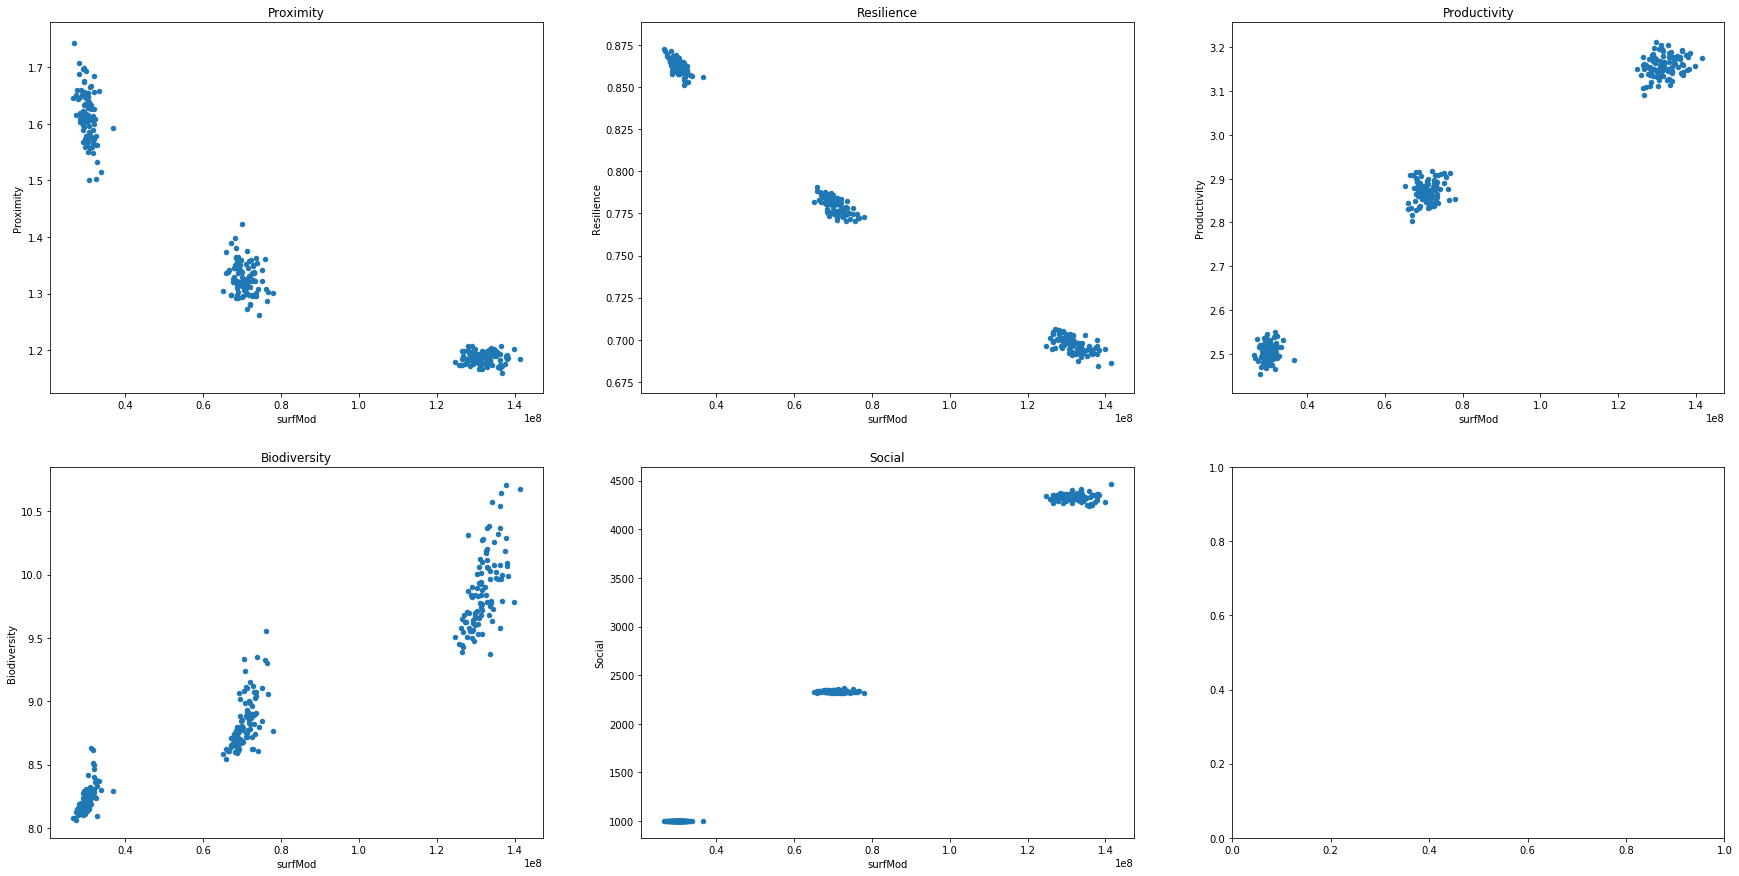

In [4]:
fig, ax = plt.subplots(2, 3)
for i,ind in enumerate(inds):
    df.plot(x='surfMod',y=ind,ax=ax[i//3][i%3], title=ind, kind='scatter', figsize=(30,15))


# Benchmark

In [5]:
import timeit
scenarios = ScenariosStack(mcmc.indicators, mcmc.reallocator, mcmc.patches)
for ind in ['Proximity', 'Resilience', 'Productivity', 'Biodiversity', 'Social']:
    print('{}: {:.4f} s'.format(ind,
        timeit.timeit(lambda: eval('mcmc.indicators._indicators[\''+ind+'\'].compute_indicator(mcmc.patches)'), number=10)/10
        ))

Proximity: 0.0100 s
Resilience: 0.0281 s
Productivity: 0.0019 s
Biodiversity: 0.0092 s
Social: 0.0691 s


In [6]:
patches = mcmc.patches.copy()
print('\nreallocate: {:.4f} s'.format(timeit.timeit(lambda:
    mcmc.reallocator.reallocate(patches)
    , number=10)/10))


reallocate: 0.0139 s


In [7]:
patches[patches['cultgeopat']!=patches['init_cult']].shape

(9000, 16)

Now we have reallocated 9000 patches, we can observe the impact of the reallocation on the indicators.

In [8]:
scenarios = ScenariosStack(mcmc.indicators, mcmc.reallocator, patches)
for ind in ['Proximity', 'Resilience', 'Productivity', 'Biodiversity', 'Social']:
    print('{}: {:.4f} s'.format(ind,
        timeit.timeit(lambda: eval('mcmc.indicators._indicators[\''+ind+'\'].compute_indicator(patches)'), number=20)/20
        ))

Proximity: 0.0154 s
Resilience: 0.0274 s
Productivity: 0.0043 s
Biodiversity: 0.0102 s
Social: 0.0876 s
